## **DTS Data Science** 
# Institut Teknologi Sepuluh Nopember (Kelas B)


## **CHALLENGE 3**

## **Nutrition Facts for McDonald's Menu**

**Introduction**

Ray Kroc wanted to build a restaurant system that would be famous for providing food of cosistently high quality and uniform methods of preparation. He wanted to serve burgers, buns, fries and beverages that tasted just the same in Alaska as they did in Alabama. To achieve this, he chose a unique path: persuading both franchisees and suppliers to buy into his vision, working not for McDonald's but for themselves, together with McDonald's. Many of McDonald's most famous menu item's - Like Big Mac, Filet-O-Fish, and Egg McMuffin were created by franchisees

**Nutrition Facts for McDonald's Menu Dataset** provides a nutrition analysis of every menu item on the US McDonald's menu, including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts.

# Klasifikasi menggunakan Decision Tree

Menu McDonald's diklasifikasikan berdasarkan nutrisi untuk setiap category dengan menggunakan metode Decision Tree. Pada pengukuran nutrisi untuk 260 item menu McDonald's tersebut, variabel yang digunakan terdiri dari serving size, calories, sodium content, dll (total ada 24 variabel). Variabel yang diprediksi oleh classifier adalah 9 category, yang terdiri dari Breakfast, Beef & Pork, Chicken & Fish, Salads, Snacks & Sides, Desserts, Beverages, and Coffee & Tea, dan smoothies &shakes.


Import packages-packages yang dibutuhkan dan melakukan ploting untuk melihat hubungan antara category dengan 24 variabel

In [ ]:
library(caret)
library(e1071)
library(rpart)
library(rpart.plot)
library(randomForest)
colnames(menu)
library(tidyverse)
library(stringr)

menu<-read.csv('menu.csv')
menu

#Melihat hubungan antara Calories dengan beberapa Category
by_calories = menu %>% select(Category, Item, Calories) %>% arrange(desc(Calories)) 
print(head (by_calories, 1))

ggplot(by_calories,aes(x=Category , y = Calories)) +
  geom_point(aes(color = ifelse(Calories >= max(Calories), T, F)), size = 4, shape = 20) +
  scale_color_manual(values = c('blue', 'red')) + 
  labs(color = " Max Calories", y = "Calories Content", title = "Calories Contamination - Mac D Foods") + 
  coord_flip()+
  theme_gray()

#update "menu"
by_caloriesfromfat = menu %>% select(Category, Item, Calories_from_Fat) %>% arrange(desc(Calories_from_Fat)) 
print(head (by_caloriesfromfat, 1))

ggplot(by_caloriesfromfat,aes(x=Category , y = Calories_from_Fat)) +
  geom_point(aes(color = ifelse(Calories_from_Fat >= max(Calories_from_Fat), T, F)), size = 4, shape = 20) +
  scale_color_manual(values = c('blue', 'red')) + 
  labs(color = " Max Calories", y = "Calories from Fat Content", title = "Calories from Fat Contamination - Mac D Foods") + 
  coord_flip()+
  theme_gray()

by_totalfat = menu %>% select(Category, Item, Total_Fat) %>% arrange(desc(Total_Fat)) 
print(head (by_totalfat, 1))

ggplot(by_totalfat,aes(x=Category , y = Total_Fat)) +
  geom_point(aes(color = ifelse(Total_Fat >= max(Total_Fat), T, F)), size = 4, shape = 20) +
  scale_color_manual(values = c('blue', 'red')) + 
  labs(color = " Max Calories", y = "Total Fat Content", title = "Total Fat Contamination - Mac D Foods") + 
  coord_flip()+
  theme_gray()

SyntaxError: ignored

Menghapus beberapa kolom yang tidak dibutuhkan untuk memprediksi category berdasarkan kandungan nutrisi. Kolom tersebut terdiri dari Saturated.Fat(%Daily Value), Cholesterol(%Daily Value), Sodium (%Daily Value), Carbohydrates (%Daily Value), Dietary.Fiber (%Daily Value), Item, dan Serving.Size.

In [ ]:
#summary of the dataset
summary(menu)
#Hapus kolom yang tidak diperlukan 

menu$'Saturated.Fat....Daily.Value.' <- NULL
print(menu$'Saturated.Fat....Daily.Value.' <- NULL)

menu$'Cholesterol....Daily.Value.' <- NULL
print(menu$'Cholesterol....Daily.Value.' <- NULL)


menu$'Sodium....Daily.Value.' <- NULL
print(menu$'Sodium....Daily.Value.' <- NULL)

menu$'Carbohydrates....Daily.Value.' <- NULL
print(menu$'Carbohydrates....Daily.Value.' <- NULL)

menu$'Dietary.Fiber....Daily.Value.' <- NULL
print(menu$'Dietary.Fiber....Daily.Value.' <- NULL)

menu$Item <- NULL
print(menu$Item <- NULL)

menu$Serving.Size <- NULL
print(menu$Serving.Size <- NULL)

               Category                                       Item    
 Coffee & Tea      :95   1% Low Fat Milk Jug                    :  1  
 Breakfast         :42   Apple Slices                           :  1  
 Smoothies & Shakes:28   Bacon Buffalo Ranch McChicken          :  1  
 Beverages         :27   Bacon Cheddar McChicken                :  1  
 Chicken & Fish    :27   Bacon Clubhouse Burger                 :  1  
 Beef & Pork       :15   Bacon Clubhouse Crispy Chicken Sandwich:  1  
 (Other)           :26   (Other)                                :254  
       Serving.Size    Calories      Calories_from_Fat   Total_Fat      
 16 fl oz cup: 45   Min.   :   0.0   Min.   :   0.0    Min.   :  0.000  
 12 fl oz cup: 38   1st Qu.: 210.0   1st Qu.:  20.0    1st Qu.:  2.375  
 22 fl oz cup: 20   Median : 340.0   Median : 100.0    Median : 11.000  
 20 fl oz cup: 16   Mean   : 368.3   Mean   : 127.1    Mean   : 14.165  
 21 fl oz cup:  7   3rd Qu.: 500.0   3rd Qu.: 200.0    3rd Qu.: 22.

NULL
NULL
NULL
NULL
NULL
NULL
NULL


Mengganti tipe data character pada category ke dalam factor.

In [ ]:
#mengganti tipe chr(character) pada category ke factor
class(menu$Category) 
menu$Category <- as.factor(menu$Category)  
class(menu$Category) 

#data menu
str(menu)
levels(menu$Category)

[1] "factor"

[1] "factor"

'data.frame':	260 obs. of  17 variables:
 $ Category                 : Factor w/ 9 levels "Beef & Pork",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Calories                 : int  300 250 370 450 400 430 460 520 410 470 ...
 $ Calories_from_Fat        : int  120 70 200 250 210 210 230 270 180 220 ...
 $ Total_Fat                : num  13 8 23 28 23 23 26 30 20 25 ...
 $ Total.Fat....Daily.Value.: int  20 12 35 43 35 36 40 47 32 38 ...
 $ Saturated.Fat            : num  5 3 8 10 8 9 13 14 11 12 ...
 $ Trans.Fat                : num  0 0 0 0 0 1 0 0 0 0 ...
 $ Cholesterol              : int  260 25 45 285 50 300 250 250 35 35 ...
 $ Sodium                   : int  750 770 780 860 880 960 1300 1410 1300 1420 ...
 $ Carbohydrates            : int  31 30 29 30 30 31 38 43 36 42 ...
 $ Dietary.Fiber            : int  4 4 4 4 4 4 2 3 2 3 ...
 $ Sugars                   : int  3 3 2 2 2 3 3 4 3 4 ...
 $ Protein                  : int  17 18 14 21 21 26 19 19 20 20 ...
 $ Vitamin.A....Daily.Value.: int  10 

[1] "Beef & Pork"        "Beverages"          "Breakfast"         
[4] "Chicken & Fish"     "Coffee & Tea"       "Desserts"          
[7] "Salads"             "Smoothies & Shakes" "Snacks & Sides"

Melakukan pembagian data training sebesar 80% dan data testing sebesar 20%.

In [ ]:
#training data dan test data (dengan training data = 80% dan  testing data = 20%)
set.seed(1)
index <- createDataPartition(menu$Category, p=0.80, list=FALSE) 
index

train <- menu[index,]
train

test <- menu[-index,]
test

Resample1
1
2
3
5
6
7
8
10
11
12


,Category,Calories,Calories_from_Fat,Total_Fat,Total.Fat....Daily.Value.,Saturated.Fat,Trans.Fat,Cholesterol,Sodium,Carbohydrates,Dietary.Fiber,Sugars,Protein,Vitamin.A....Daily.Value.,Vitamin.C....Daily.Value.,Calcium....Daily.Value.,Iron....Daily.Value.
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Breakfast,300,120,13,20,5,0.0,260,750,31,4,3,17,10,0,25,15
2,Breakfast,250,70,8,12,3,0.0,25,770,30,4,3,18,6,0,25,8
3,Breakfast,370,200,23,35,8,0.0,45,780,29,4,2,14,8,0,25,10
5,Breakfast,400,210,23,35,8,0.0,50,880,30,4,2,21,6,0,25,10
6,Breakfast,430,210,23,36,9,1.0,300,960,31,4,3,26,15,2,30,20
7,Breakfast,460,230,26,40,13,0.0,250,1300,38,2,3,19,10,8,15,15
8,Breakfast,520,270,30,47,14,0.0,250,1410,43,3,4,19,15,8,20,20
10,Breakfast,470,220,25,38,12,0.0,35,1420,42,3,4,20,6,8,15,15
11,Breakfast,430,240,27,42,12,0.0,30,1080,34,2,2,11,0,0,6,15


,Category,Calories,Calories_from_Fat,Total_Fat,Total.Fat....Daily.Value.,Saturated.Fat,Trans.Fat,Cholesterol,Sodium,Carbohydrates,Dietary.Fiber,Sugars,Protein,Vitamin.A....Daily.Value.,Vitamin.C....Daily.Value.,Calcium....Daily.Value.,Iron....Daily.Value.
,<fct>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,Breakfast,450,250,28.0,43,10.0,0.0,285,860,30,4,2,21,15,0,30,15
9,Breakfast,410,180,20.0,32,11.0,0.0,35,1300,36,2,3,20,2,8,15,10
18,Breakfast,470,220,24.0,37,9.0,0.0,30,1290,46,3,4,17,4,2,8,15
24,Breakfast,500,230,26.0,40,10.0,0.0,50,1320,46,2,15,21,2,0,20,10
31,Breakfast,690,370,41.0,63,14.0,0.0,35,1700,55,4,4,26,4,2,10,15
34,Breakfast,990,410,46.0,70,16.0,0.0,55,2170,110,6,17,35,0,2,25,30
36,Breakfast,350,80,9.0,13,2.0,0.0,20,590,60,3,14,8,0,0,15,15
42,Breakfast,260,40,4.0,6,1.5,0.0,5,115,49,5,18,5,2,130,6,10
49,Beef & Pork,240,70,8.0,12,3.0,0.0,30,480,32,1,6,12,2,2,10,15


Membangun model yang akan diprediksi dengan menggunakan metode Decision Tree dan melakukan visualisasi berdasarkan model yang terbentuk.

n= 211 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 211 135 Coffee & Tea (0.057 0.1 0.16 0.1 0.36 0.028 0.024 0.11 0.052)  
   2) Sodium>=285 81  48 Breakfast (0.15 0 0.41 0.27 0 0 0.049 0.037 0.086)  
     4) Trans.Fat>=0.75 18   7 Beef & Pork (0.61 0 0.17 0.056 0 0 0 0.17 0) *
     5) Trans.Fat< 0.75 63  33 Breakfast (0.016 0 0.48 0.33 0 0 0.063 0 0.11)  
      10) Saturated.Fat>=10.5 17   0 Breakfast (0 0 1 0 0 0 0 0 0) *
      11) Saturated.Fat< 10.5 46  25 Chicken & Fish (0.022 0 0.28 0.46 0 0 0.087 0 0.15)  
        22) Protein>=21.5 21   5 Chicken & Fish (0 0 0.048 0.76 0 0 0.19 0 0) *
        23) Protein< 21.5 25  13 Breakfast (0.04 0 0.48 0.2 0 0 0 0 0.28)  
          46) Saturated.Fat>=6 9   0 Breakfast (0 0 1 0 0 0 0 0 0) *
          47) Saturated.Fat< 6 16   9 Snacks & Sides (0.062 0 0.19 0.31 0 0 0 0 0.44) *
   3) Sodium< 285 130  54 Coffee & Tea (0 0.17 0.0077 0 0.58 0.046 0.0077 0.15 0.031)  
     6) Vitamin.A....Daily.Value.< 3 45  24 B

$obj
n= 211 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 211 135 Coffee & Tea (0.057 0.1 0.16 0.1 0.36 0.028 0.024 0.11 0.052)  
   2) Sodium>=285 81  48 Breakfast (0.15 0 0.41 0.27 0 0 0.049 0.037 0.086)  
     4) Trans.Fat>=0.75 18   7 Beef & Pork (0.61 0 0.17 0.056 0 0 0 0.17 0) *
     5) Trans.Fat< 0.75 63  33 Breakfast (0.016 0 0.48 0.33 0 0 0.063 0 0.11)  
      10) Saturated.Fat>=10.5 17   0 Breakfast (0 0 1 0 0 0 0 0 0) *
      11) Saturated.Fat< 10.5 46  25 Chicken & Fish (0.022 0 0.28 0.46 0 0 0.087 0 0.15)  
        22) Protein>=21.5 21   5 Chicken & Fish (0 0 0.048 0.76 0 0 0.19 0 0) *
        23) Protein< 21.5 25  13 Breakfast (0.04 0 0.48 0.2 0 0 0 0 0.28)  
          46) Saturated.Fat>=6 9   0 Breakfast (0 0 1 0 0 0 0 0 0) *
          47) Saturated.Fat< 6 16   9 Snacks & Sides (0.062 0 0.19 0.31 0 0 0 0 0.44) *
   3) Sodium< 285 130  54 Coffee & Tea (0 0.17 0.0077 0 0.58 0.046 0.0077 0.15 0.031)  
     6) Vitamin.A....Daily.Value.< 3 45 

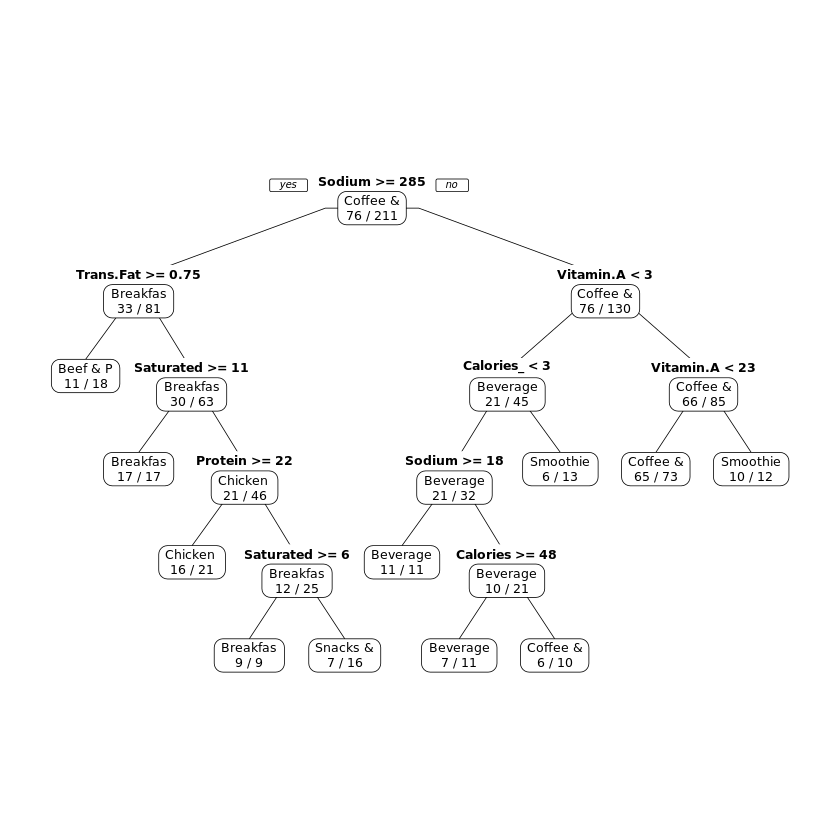

In [ ]:
#Membangun model untuk memprediksi nutrisi setiap category

model <- rpart(Category~., data=train) #rpart : untuk memperoleh model classification Decision Tree
model

#Bentuk visualisasi dari model classification Decision Tree
prp(model, type=1, extra=2)
print(prp(model, type=1, extra=2))
#Opsi extra=2 meminta fungsi menampilkan proporsi dari masing-masing kelas variabel target dan kelas apa yang dominan


Melakukan prediksi sesuai dengan model yang terbentuk menggunakan metode Decision Tree sebelumnya.

In [ ]:
#Fungsi prediksi model
pred_dt <- predict(model, test, type="class")
pred_dt

confusionMatrix(pred_dt, test$Category)
print(confusionMatrix(pred_dt, test$Category))


4                  9                 18                 24 
         Breakfast          Breakfast          Breakfast          Breakfast 
                31                 34                 36                 42 
         Breakfast          Breakfast     Snacks & Sides Smoothies & Shakes 
                49                 54                 57                 62 
    Snacks & Sides        Beef & Pork     Chicken & Fish     Chicken & Fish 
                69                 70                 76                 81 
    Snacks & Sides     Snacks & Sides     Chicken & Fish     Chicken & Fish 
                85                 98                101                110 
    Snacks & Sides Smoothies & Shakes Smoothies & Shakes       Coffee & Tea 
               117                123                124                131 
         Beverages          Beverages          Beverages       Coffee & Tea 
               135                147                149                154 
         Beverages       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               157                158                162                173 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               176                186                188                191 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               194                195                207                213 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               215                220                223                225 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               242                245                248                255 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               257 
       Beef & Pork 
9 Levels: Beef & Pork Beverages Breakfast Chicken & Fish ... Snacks & Sides

Confusion Matrix and Statistics

                    Reference
Prediction           Beef & Pork Beverages Breakfast Chicken & Fish
  Beef & Pork                  1         0         0              0
  Beverages                    0         4         0              0
  Breakfast                    0         0         6              0
  Chicken & Fish               1         0         0              3
  Coffee & Tea                 0         1         0              0
  Desserts                     0         0         0              0
  Salads                       0         0         0              0
  Smoothies & Shakes           0         0         1              0
  Snacks & Sides               1         0         1              2
                    Reference
Prediction           Coffee & Tea Desserts Salads Smoothies & Shakes
  Beef & Pork                   0        0      0                  1
  Beverages                     0        0      0                  0
  Breakfast         

Confusion Matrix and Statistics

                    Reference
Prediction           Beef & Pork Beverages Breakfast Chicken & Fish
  Beef & Pork                  1         0         0              0
  Beverages                    0         4         0              0
  Breakfast                    0         0         6              0
  Chicken & Fish               1         0         0              3
  Coffee & Tea                 0         1         0              0
  Desserts                     0         0         0              0
  Salads                       0         0         0              0
  Smoothies & Shakes           0         0         1              0
  Snacks & Sides               1         0         1              2
                    Reference
Prediction           Coffee & Tea Desserts Salads Smoothies & Shakes
  Beef & Pork                   0        0      0                  1
  Beverages                     0        0      0                  0
  Breakfast         


Jika kita hanya membuat model tunggal pada data, maka model tersebut memiliki resiko untuk overfitting atau underfitting, dan variansi besar atau bias. Oleh karena itu, untuk menghindari hal tersebut perlu dilakukan pembentukan banyak model pada data training kemudian dikombinasikan. Random forest merupakan salah satu metode populer dari ensembling technique yang biasa digunakan untuk meningkatkan performa prediksi Decision Tree. Cara kerja Random Forest adalah dengan merata-ratakan banyak model yang terbentuk sehingga mampu mereduksi variansinya


Call:
 randomForest(formula = Category ~ ., data = train, ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 4

        OOB estimate of  error rate: 20.38%
Confusion matrix:
                   Beef & Pork Beverages Breakfast Chicken & Fish Coffee & Tea
Beef & Pork                 11         0         1              0            0
Beverages                    0        17         0              0            4
Breakfast                    2         0        27              2            0
Chicken & Fish               0         0         5             16            0
Coffee & Tea                 0         7         0              0           67
Desserts                     0         1         0              0            2
Salads                       0         0         0              1            0
Smoothies & Shakes           0         0         0              0            5
Snacks & Sides      

                          MeanDecreaseGini
Calories                          5.383249
Calories_from_Fat                 5.479341
Total_Fat                         6.198418
Total.Fat....Daily.Value.         6.046461
Saturated.Fat                     8.052770
Trans.Fat                         6.604863
Cholesterol                      10.823912
Sodium                           21.316004
Carbohydrates                     8.348090
Dietary.Fiber                     9.914741
Sugars                           13.177285
Protein                          10.884464
Vitamin.A....Daily.Value.        15.415669
Vitamin.C....Daily.Value.        12.118165
Calcium....Daily.Value.           7.376613
Iron....Daily.Value.             14.986871


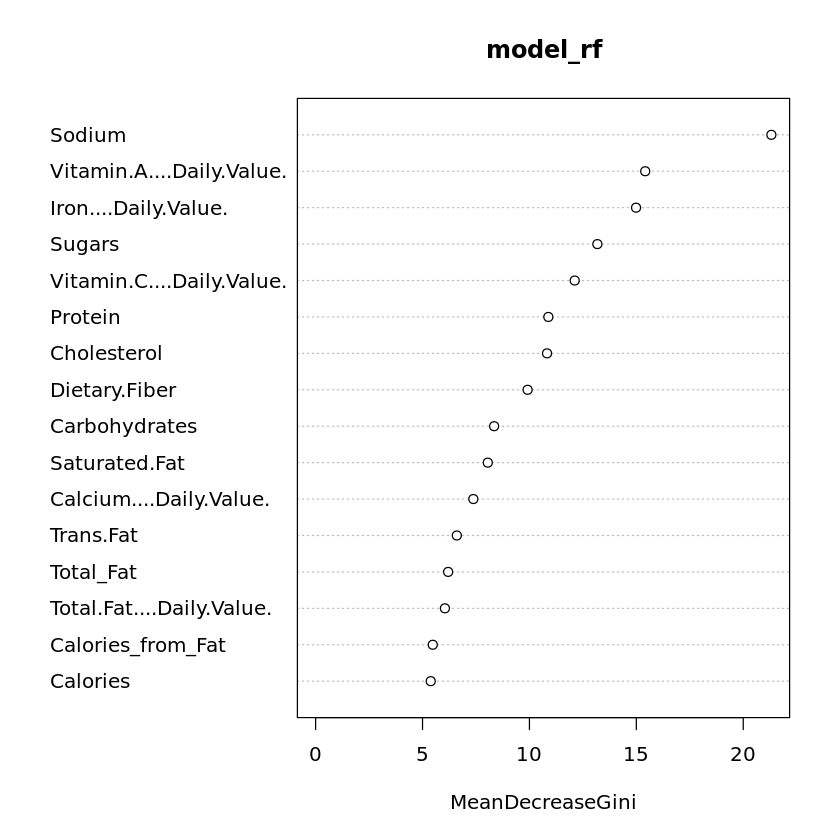

In [ ]:
model_rf <- randomForest(Category~., train, ntree=50)
model_rf

varImpPlot(model_rf)
print(varImpPlot(model_rf))
#bedasarkan hasil output Sodium adalah variabel terpenting dalam model untuk memprediksi Category


Bedasarkan hasil output Sodium adalah variabel terpenting dalam model untuk memprediksi Category

Selanjutnya melakukan prediksi model sesuai dengan model yang terbentuk dari metode Random Forest.

In [ ]:
pred_rf <- predict(model_rf, test)  
pred_rf

mean(pred_rf == test$Category) #menunjukkan nilai akuraasi dari prediksi

confusionMatrix(pred_rf, test$Category)
print(confusionMatrix(pred_rf, test$Category))

mean(pred_rf == test$Category) #menunjukkan nilai akuraasi dari prediksi

4                  9                 18                 24 
         Breakfast          Breakfast          Breakfast          Breakfast 
                31                 34                 36                 42 
         Breakfast          Breakfast          Breakfast          Breakfast 
                49                 54                 57                 62 
    Snacks & Sides        Beef & Pork          Breakfast     Chicken & Fish 
                69                 70                 76                 81 
    Chicken & Fish     Chicken & Fish     Chicken & Fish          Breakfast 
                85                 98                101                110 
            Salads     Snacks & Sides     Snacks & Sides       Coffee & Tea 
               117                123                124                131 
         Beverages          Beverages          Beverages       Coffee & Tea 
               135                147                149                154 
         Beverages       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               157                158                162                173 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               176                186                188                191 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               194                195                207                213 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               215                220                223                225 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               242                245                248                255 
      Coffee & Tea       Coffee & Tea       Coffee & Tea       Coffee & Tea 
               257 
Smoothies & Shakes 
9 Levels: Beef & Pork Beverages Breakfast Chicken & Fish ... Snacks & Sides

[1] 0.8163265

Confusion Matrix and Statistics

                    Reference
Prediction           Beef & Pork Beverages Breakfast Chicken & Fish
  Beef & Pork                  1         0         0              0
  Beverages                    0         4         0              0
  Breakfast                    1         0         8              1
  Chicken & Fish               0         0         0              4
  Coffee & Tea                 0         1         0              0
  Desserts                     0         0         0              0
  Salads                       0         0         0              0
  Smoothies & Shakes           0         0         0              0
  Snacks & Sides               1         0         0              0
                    Reference
Prediction           Coffee & Tea Desserts Salads Smoothies & Shakes
  Beef & Pork                   0        0      0                  0
  Beverages                     0        0      0                  0
  Breakfast         

Confusion Matrix and Statistics

                    Reference
Prediction           Beef & Pork Beverages Breakfast Chicken & Fish
  Beef & Pork                  1         0         0              0
  Beverages                    0         4         0              0
  Breakfast                    1         0         8              1
  Chicken & Fish               0         0         0              4
  Coffee & Tea                 0         1         0              0
  Desserts                     0         0         0              0
  Salads                       0         0         0              0
  Smoothies & Shakes           0         0         0              0
  Snacks & Sides               1         0         0              0
                    Reference
Prediction           Coffee & Tea Desserts Salads Smoothies & Shakes
  Beef & Pork                   0        0      0                  0
  Beverages                     0        0      0                  0
  Breakfast         

[1] 0.8163265

Kesimpulan: Berdasarkan pembentukan model dengan menggunakan Decision Tree dan Random Forest dengan data training sebesar 80% dan data testing sebesar 20%, diperoleh nilai akurasi sebesar 0.8163 atau 82%